###1. Importamos las librerias y base de datos.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
solicitantes = pd.read_excel('/content/drive/MyDrive/0. SolicitantesCrédito.xlsx')
solicitantes

,Unnamed: 0,Edad,Sexo,Estado civil,Hijos,Perscargo,Estrato,Nivel de estudios,Tipo de contrato,Ingresos,...,Plazo,Cuota (COP),ConoCliente,Garantia,RespPat,MoraCome,PreApr,Prob.Default (PD),Score,LGD
0,1,38,NR,Casado,1,0,3,Bachiller,Ninguno,5424576,...,48,82691.506204,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1.0,0.041659,582.478943,0.063702
1,2,51,NR,Separado,6,1,4,Técnico,Ninguno,1144064,...,36,22781.212598,Buenas Referencias,Sin Codeudor,Prop.sin Hipoteca,Con Experiencia sin Mora,1.0,0.234951,479.839966,0.465636
2,3,37,Mujer,Casado,2,0,3,Tecnólogo,Indefinido,2069853,...,36,46294.596244,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,0.0,0.170330,417.653107,0.290071
3,4,29,NR,Separado,1,0,2,Tecnólogo,Ninguno,1893080,...,24,69564.950015,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,1.0,0.201659,316.791107,0.278389
4,5,42,Mujer,Casado,3,4,2,Especializacion,Ninguno,3000367,...,24,112478.307883,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,1.0,0.140929,441.809570,0.203359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,8374,31,Hombre,Soltero,2,0,5,Bachiller,Indefinido,5891088,...,48,115108.056436,Buena Experiencia CFB,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1.0,0.035120,659.471375,0.066962
8374,8375,38,Hombre,Separado,0,0,3,Bachiller,Labor Contratada,3092079,...,36,96789.562091,Buenas Referencias,Sin Codeudor,Prop.sin Hipoteca,Con Experiencia sin Mora,1.0,0.101976,465.011536,0.165936
8375,8376,43,Mujer,Casado,1,2,2,Tecnólogo,Ninguno,2542007,...,36,49713.608249,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1.0,0.156707,423.237305,0.247763
8376,8377,37,Mujer,Casado,1,2,3,Tecnólogo,Indefinido,5677067,...,36,163602.818587,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,1.0,0.037719,592.670837,0.051356


###2. Limpiamos datos y definimos variables.

In [4]:
#Definimos las variables independientes y eliminamos con dropna las filas donde no hay informacion en "PreApr"
XD = solicitantes.dropna(subset=['PreApr'])
XD = XD[['Edad', 'Hijos', 'Perscargo', 'Estrato', 'Ingresos', 'Egresos', 'Monto (EAD)', 'Plazo', 'Cuota (COP)']]

In [5]:
#Definimos nuestra variable dependiente que será "PreApr"usando las filas que sí tienen valores, por lo que borramos las que no.
YD = solicitantes['PreApr'].dropna()
#Ambos cuadros deben tener 5842 filas.

###3. Implementamos el modelo de Naive Bayes

In [6]:
### Importamos las librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#El paquete especifico del modelo
from sklearn.naive_bayes import GaussianNB

In [7]:
### Vamos a convertir los datos en arreglos y pasar los datos de DataFrame a datos mucho más simples como solo texto
XDArray = np.array(XD)
YDArray = np.array(YD)

In [8]:
### ENTRENAMOS EL MODELO
modeloNB = GaussianNB() ## Variable que aloja el modelo
modeloNB.fit(XDArray, YDArray) #Necesita XDArray y YDArray

GaussianNB()

In [9]:
## Peedecimos los YD (Etapa test)
ydPred = modeloNB.predict(XDArray) #Esta variable es lo que predice el modelo
ydPred

array([1., 0., 0., ..., 0., 0., 1.])

###4. Matriz de confusión

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [11]:
cm = confusion_matrix(YDArray, ydPred)

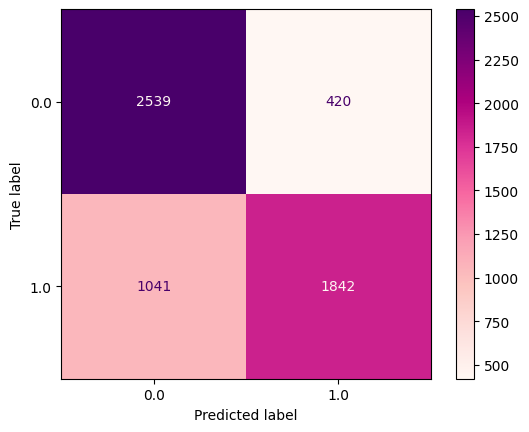

In [12]:
disp = ConfusionMatrixDisplay(cm, display_labels=modeloNB.classes_)
disp.plot(cmap = 'RdPu')
plt.show()

###5. Métricas de evaluación del modelo

In [13]:
## Vamos a extraer los valores de la matriz de confusión
VN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
VP = cm[1,1]

In [14]:
##Exactitud
exactitud = (VP+VN)/cm.sum()

In [15]:
##Tasa de error
error = (FP+FN)/cm.sum()

In [16]:
#precision
precision = VP /(VP+FP)

In [17]:
#sensibilidad
sensibilidad = VP /(VP+FN)

In [18]:
#especifidad
especifidad = VN/(VN+FP)

In [19]:
#Imprimo los mensajes
print(f'La exactitud del modelo es de {exactitud:.2%}')
print(f'EL error del modelo es de {error:.2%}')
print(f'La precisión del modelo es de {precision:.2%}')
print(f'La sensibilidad del modelo es de {sensibilidad:.2%}')
print(f'La especifidad del modelo es de {especifidad:.2%}')

La exactitud del modelo es de 74.99%
EL error del modelo es de 25.01%
La precisión del modelo es de 81.43%
La sensibilidad del modelo es de 63.89%
La especifidad del modelo es de 85.81%


### La exactitud nos muestra que el rendimiento del modelo, es decir que un **74.99% de las predicciones del modelo son correctas**, ya sea identificando correctamente a un solicitante que debe ser pre-aprobado o un prenegado. Este porcentaje funciona para umbral que manejamos que es un 75%

### Por otro lado **el 36.11% restante de los solicitantes que sí califican para una pre-aprobación están siendo clasificados erróneamente como pre-negados**. Al tener una sensibilidad baja, el modelo estaría "negando" automáticamente a una parte significativa de clientes que, en realidad, son buenos prospectos para una pre-aprobación.

### A pesar de esto su **especifidad es demasiado alta con un 85.91%** de probabilidad de identificar un prenegado como prenegado por lo que no estaríamos concediendo el crédito a personas que no están en capacidad de pagarlo (prenegados).


##**Análisis por métrica trás agregar variables.**
###**1. Exactitud:** *inicialmente teníamos una exactitud del 76.14% al evaluar con 4 variables, ahora que hicimos el ejercicio con 9 variables pordemos observar que la exactitud disminuyó a un 74.99%, por lo que podemos decir que al agregar más variables que no están fuertemente correlacionadas con la preaprobación, pueden confundir al modelo en lugar de ayudarlo, llevandolo a predicciones menos precisas y disminuyendo su capacidad de predecir correctamente en un 1,15%.*
###**2. Precisión:** *El aumento en la precisión del modelo, del 81.01% al 81.43%, indica que de todos los solicitantes que fueron predichos como pre-aprobados, una mayor proporción de ellos eran realmente pre-aprobados. Aunque la exactitud general disminuyó, el modelo se ha vuelto más selectivo, reduciendo la cantidad de solicitantes pre-negados que erróneamente se clasificaban como pre-aprobados*
###**3. Sensibilidad:** *La sensibilidad anterior era de 67.46% y disminuyó ligeramente un 63.89%. Aunque anteriormente tampoco cumplia con el umbral, el modelo continúa clasificando buenos prospectos de clientes como prenegados.*
###**4. Especifidad:** *Podemos observar un ligero incremento que pasó de 84.59%  a 85.81%, según lo que observo puedo decir que este cambio se da a una compensación, el modelo se volvió más cauto al pre-aprobar, reduciendo los falsos positivos, pero a costa de pasar por alto a más solicitantes que sí calificaban (baja sensibilidad).*

##6. Generalización del modelo.

In [20]:
#Filtro los que no tienen clasificación (no tienen valor en la columna PreApr)
XDGener = solicitantes[solicitantes['PreApr'].isna()]

In [21]:
#FIltro las variables
XDGener = XDGener [['Edad', 'Hijos', 'Perscargo', 'Estrato', 'Ingresos', 'Egresos', 'Monto (EAD)', 'Plazo', 'Cuota (COP)']]

In [22]:
#Las convierto en arreglo
XDGenerArray = np.array(XDGener)

In [23]:
#Hacer la predicción
#GENERALIZO (Genero las predicciones para los solicitantes faltantes)
ydGener = modeloNB.predict(XDGenerArray)

In [24]:
#Organizamos esta información en series, que coincidan con los indices
ydGenerSerie = pd.Series(ydGener,
                         index=solicitantes[solicitantes['PreApr'].isna()].index) #indicamos que sean los mismos indices
ydGenerSerie

,0
6,0.0
7,0.0
11,1.0
13,0.0
16,0.0
...,...
8357,0.0
8358,0.0
8367,0.0
8372,0.0


##7. Completo los valores de PreApr

In [25]:
solicitantes['PreApr'].fillna(ydGenerSerie, inplace=True)

/tmp/ipython-input-1586682269.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  solicitantes['PreApr'].fillna(ydGenerSerie, inplace=True)


In [26]:
solicitantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               8378 non-null   int64  
 1   Edad                     8378 non-null   int64  
 2   Sexo                     8378 non-null   object 
 3   Estado civil             8378 non-null   object 
 4   Hijos                    8378 non-null   int64  
 5   Perscargo                8378 non-null   int64  
 6   Estrato                  8378 non-null   int64  
 7   Nivel de estudios        8378 non-null   object 
 8   Tipo de contrato         8378 non-null   object 
 9   Ingresos                 8378 non-null   int64  
 10  Egresos                  8378 non-null   int64  
 11  Tipo de actividad        8378 non-null   object 
 12  Tipo de vivienda         8378 non-null   object 
 13  Total Activos            8378 non-null   float64
 14  Total pasivos           

##8. Exportamos la base de datos completa.

In [27]:
solicitantes.to_excel('SolicitantesCompleta.xlsx')